# Review Supervised Learning: Comparing Classifiers

In this exercise, we review all classifiers we have learned so far, and test their performance on the 20-newsgroups dataset. We saw this dataset earlier in [20_newsgroups.ipynb](../11_bayes/20_newsgroups.ipynb).

Let's import all models.

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, \
    ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC

Let's import the dataset. We use the keyword argument `categories=[...]` to limit our dataset. Omit this argument to load all twenty newsgroups.

In [2]:
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'sci.space', 'talk.religion.misc', 'comp.graphics']
newsgroups = fetch_20newsgroups(subset='train', categories=categories)
print newsgroups.target_names 
print len(newsgroups.data), 'newsgroups articles in', len(newsgroups.target_names), 'groups'

['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']
2034 newsgroups articles in 4 groups


The newsgroup articles are stored in `newsgroups.data`. These are actual messages.

The target variables that we want to predict are in `newsgroups.target`. The number in `target` specifies the actual newsgroup in the `target_names`.

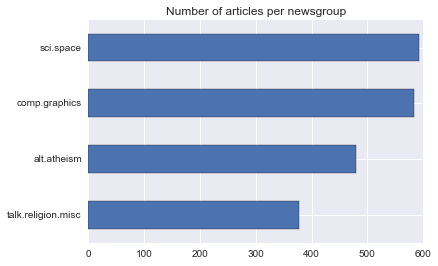

In [3]:
import pandas as pd
import seaborn
from matplotlib import pyplot as plt
%matplotlib inline

y = newsgroups.target
groups = pd.Series(newsgroups.target_names)
f = groups[y].value_counts(ascending=True).plot(kind='barh', title="Number of articles per newsgroup")

Since we're processing text, we need vectorizers that transform our text features into a usable feature matrix we can feed into our models. You could use `CountVectorizer` or `TfidfVectorizer`, which we both explained in more detail in [20_newsgroups.ipynb](../11_bayes/20_newsgroups.ipynb). 

Feel free to **try out different options**, such as `ngram_range=(0,3)`.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()  # or TfidfVectorizer, or different options
X = cv.fit_transform(newsgroups.data)

Fit the model and measure cross-validated accuracy, or AUC. Feel free to **try out different options here** as well, such as the regularization parameter, kernels, etc.

In [5]:
from sklearn.cross_validation import train_test_split, cross_val_score

In [6]:
model = KNeighborsClassifier(n_neighbors=50)
print cross_val_score(model, X, y).mean()

0.559010378995


Obviously you can do better than that.

## Exercise

1. Given the above distribution of newsgroups (the `y`s), what is reasonable accuracy to expect? What would a naive classier's accuracy be?
1. Try out different models, testing their cross-validated accuracy
1. Try out different options (such as regularization parameters, kernels, etc.)
1. Try out different text vectorizers and options
1. If you find a model you like, try different categories (or all of them) and see if this impacts your performance
1. Try to interpret its learned parameters and plot some nice insights

For interpretation, recall that
- LogisticRegression gives you coefficients for the log odds of the corresponding feature
- Naive Bayes computes priors for the classes, and likelihoods for the corresponding features
- Random Forests give you feature importances



In [7]:
# Your code here